In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.decomposition import PCA

In [39]:
pd.options.display.max_columns = None

In [40]:
ef = pd.ExcelFile('data.xls')
df = ef.parse('Data', skiprows = 1, names = ['lim_kredytu', 'plec', 'wyksztalcenie', 'stan_cywilny', 'wiek', 'opozn_plat_wrz', 'opozn_plat_sie', 'opozn_plat_lip', 'opozn_plat_cze', 'opozn_plat_maj', 'opozn_plat_kwi', 'kwota_wyciagu_wrz', 'kwota_wyciagu_sie', 'kwota_wyciagu_lip', 'kwota_wyciagu_cze', 'kwota_wyciagu_maj', 'kwota_wyciagu_kwi', 'platnosc_wrz', 'platnosc_sie', 'platnosc_lip', 'platnosc_cze', 'platnosc_maj', 'platnosc_kwi', 'y'])

#df = pd.read_csv('data.xls', header = 1, sep = '\t', encoding = 'ISO-8859-1') # error
df.head()

,lim_kredytu,plec,wyksztalcenie,stan_cywilny,wiek,opozn_plat_wrz,opozn_plat_sie,opozn_plat_lip,opozn_plat_cze,opozn_plat_maj,opozn_plat_kwi,kwota_wyciagu_wrz,kwota_wyciagu_sie,kwota_wyciagu_lip,kwota_wyciagu_cze,kwota_wyciagu_maj,kwota_wyciagu_kwi,platnosc_wrz,platnosc_sie,platnosc_lip,platnosc_cze,platnosc_maj,platnosc_kwi,y
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [41]:
df.rename({'y' : 'default'}, axis = 'columns', inplace = True)
df.head()

,lim_kredytu,plec,wyksztalcenie,stan_cywilny,wiek,opozn_plat_wrz,opozn_plat_sie,opozn_plat_lip,opozn_plat_cze,opozn_plat_maj,opozn_plat_kwi,kwota_wyciagu_wrz,kwota_wyciagu_sie,kwota_wyciagu_lip,kwota_wyciagu_cze,kwota_wyciagu_maj,kwota_wyciagu_kwi,platnosc_wrz,platnosc_sie,platnosc_lip,platnosc_cze,platnosc_maj,platnosc_kwi,default
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [42]:
df.dtypes

lim_kredytu          int64
plec                 int64
wyksztalcenie        int64
stan_cywilny         int64
wiek                 int64
opozn_plat_wrz       int64
opozn_plat_sie       int64
opozn_plat_lip       int64
opozn_plat_cze       int64
opozn_plat_maj       int64
opozn_plat_kwi       int64
kwota_wyciagu_wrz    int64
kwota_wyciagu_sie    int64
kwota_wyciagu_lip    int64
kwota_wyciagu_cze    int64
kwota_wyciagu_maj    int64
kwota_wyciagu_kwi    int64
platnosc_wrz         int64
platnosc_sie         int64
platnosc_lip         int64
platnosc_cze         int64
platnosc_maj         int64
platnosc_kwi         int64
default              int64
dtype: object

In [43]:
df['plec'].unique()

array([2, 1], dtype=int64)

In [44]:
df['wyksztalcenie'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [45]:
df['stan_cywilny'].unique()

array([1, 2, 3, 0], dtype=int64)

In [46]:
len(df.loc[(df['wyksztalcenie'] == 0) | (df['stan_cywilny'] == 0)])

68

In [47]:
len(df)

30000

In [48]:
len(df.loc[(df['wyksztalcenie'] == 0) | (df['stan_cywilny'] == 0)]) / len(df)
# it is less then 1% of data so we do not have to impute the data

0.002266666666666667

In [49]:
df = df.loc[(df['wyksztalcenie'] != 0) & (df['stan_cywilny'] != 0)]
len(df)

29932

In [50]:
df['wyksztalcenie'].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

In [51]:
df['stan_cywilny'].unique()

array([1, 2, 3], dtype=int64)

In [52]:
df_default = df[df['default'] == 1]
len(df_default)

6631

In [53]:
df_no_default = df[df['default'] == 0]
len(df_no_default)

23301

In [54]:
def_downsampled = resample(df_default, replace = False, n_samples = 1000, random_state = 42)
len(def_downsampled)

1000

In [55]:
def_no_downsampled = resample(df_no_default, replace = False, n_samples = 1000, random_state = 42)
len(def_no_downsampled)

1000

In [56]:
df_downsample = pd.concat([def_no_downsampled, def_downsampled])
len(df_downsample)

2000

Time to SVM part.

In [57]:
X = df_downsample.drop('default', axis = 1).copy()
X.head()

,lim_kredytu,plec,wyksztalcenie,stan_cywilny,wiek,opozn_plat_wrz,opozn_plat_sie,opozn_plat_lip,opozn_plat_cze,opozn_plat_maj,opozn_plat_kwi,kwota_wyciagu_wrz,kwota_wyciagu_sie,kwota_wyciagu_lip,kwota_wyciagu_cze,kwota_wyciagu_maj,kwota_wyciagu_kwi,platnosc_wrz,platnosc_sie,platnosc_lip,platnosc_cze,platnosc_maj,platnosc_kwi
642,130000,2,3,1,28,0,0,0,0,-2,-2,100143,50456,50000,0,0,0,2500,1000,0,0,0,0
4679,170000,1,3,1,29,0,0,0,0,0,0,165027,168990,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16005,180000,2,2,1,29,0,0,0,0,0,0,25781,26000,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22975,210000,2,2,2,32,-2,-2,-2,-2,-2,-2,355,975,410,0,0,0,979,412,0,0,0,0
17536,190000,2,3,1,45,0,0,0,0,0,0,76433,78472,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [58]:
y = df_downsample['default'].copy()
y.head()

642      0
4679     0
16005    0
22975    0
17536    0
Name: default, dtype: int64

One hot encoding - in order to use categorical data with scikit learn SVM we have to use a trick that converts a column of categorical data into multiple columns of binary values.

In [59]:
pd.get_dummies(X, columns = ['stan_cywilny']).head()

,lim_kredytu,plec,wyksztalcenie,wiek,opozn_plat_wrz,opozn_plat_sie,opozn_plat_lip,opozn_plat_cze,opozn_plat_maj,opozn_plat_kwi,kwota_wyciagu_wrz,kwota_wyciagu_sie,kwota_wyciagu_lip,kwota_wyciagu_cze,kwota_wyciagu_maj,kwota_wyciagu_kwi,platnosc_wrz,platnosc_sie,platnosc_lip,platnosc_cze,platnosc_maj,platnosc_kwi,stan_cywilny_1,stan_cywilny_2,stan_cywilny_3
642,130000,2,3,28,0,0,0,0,-2,-2,100143,50456,50000,0,0,0,2500,1000,0,0,0,0,1,0,0
4679,170000,1,3,29,0,0,0,0,0,0,165027,168990,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300,1,0,0
16005,180000,2,2,29,0,0,0,0,0,0,25781,26000,26310,26662,26166,26176,1800,1800,1500,1056,950,1000,1,0,0
22975,210000,2,2,32,-2,-2,-2,-2,-2,-2,355,975,410,0,0,0,979,412,0,0,0,0,0,1,0
17536,190000,2,3,45,0,0,0,0,0,0,76433,78472,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000,1,0,0


In [60]:
cls = ['plec', 'wyksztalcenie', 'stan_cywilny', 'opozn_plat_wrz', 'opozn_plat_sie', 'opozn_plat_lip', 'opozn_plat_cze', 'opozn_plat_maj', 'opozn_plat_kwi']
X_encoded = pd.get_dummies(X, columns = cls)
X_encoded.head()

,lim_kredytu,wiek,kwota_wyciagu_wrz,kwota_wyciagu_sie,kwota_wyciagu_lip,kwota_wyciagu_cze,kwota_wyciagu_maj,kwota_wyciagu_kwi,platnosc_wrz,platnosc_sie,platnosc_lip,platnosc_cze,platnosc_maj,platnosc_kwi,plec_1,plec_2,wyksztalcenie_1,wyksztalcenie_2,wyksztalcenie_3,wyksztalcenie_4,wyksztalcenie_5,wyksztalcenie_6,stan_cywilny_1,stan_cywilny_2,stan_cywilny_3,opozn_plat_wrz_-2,opozn_plat_wrz_-1,opozn_plat_wrz_0,opozn_plat_wrz_1,opozn_plat_wrz_2,opozn_plat_wrz_3,opozn_plat_wrz_4,opozn_plat_wrz_5,opozn_plat_wrz_6,opozn_plat_wrz_7,opozn_plat_wrz_8,opozn_plat_sie_-2,opozn_plat_sie_-1,opozn_plat_sie_0,opozn_plat_sie_1,opozn_plat_sie_2,opozn_plat_sie_3,opozn_plat_sie_4,opozn_plat_sie_5,opozn_plat_sie_6,opozn_plat_sie_7,opozn_plat_lip_-2,opozn_plat_lip_-1,opozn_plat_lip_0,opozn_plat_lip_2,opozn_plat_lip_3,opozn_plat_lip_4,opozn_plat_lip_5,opozn_plat_lip_6,opozn_plat_lip_7,opozn_plat_cze_-2,opozn_plat_cze_-1,opozn_plat_cze_0,opozn_plat_cze_2,opozn_plat_cze_3,opozn_plat_cze_4,opozn_plat_cze_5,opozn_plat_cze_7,opozn_plat_maj_-2,opozn_plat_maj_-1,opozn_plat_maj_0,opozn_plat_maj_2,opozn_plat_maj_3,opozn_plat_maj_4,opozn_plat_maj_5,opozn_plat_maj_6,opozn_plat_maj_7,opozn_plat_kwi_-2,opozn_plat_kwi_-1,opozn_plat_kwi_0,opozn_plat_kwi_2,opozn_plat_kwi_3,opozn_plat_kwi_4,opozn_plat_kwi_5,opozn_plat_kwi_6,opozn_plat_kwi_7
642,130000,28,100143,50456,50000,0,0,0,2500,1000,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4679,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
16005,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,1500,1056,950,1000,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
22975,210000,32,355,975,410,0,0,0,979,412,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
17536,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Radial Basis Function (RBF) we are using with our SVM assumes the data are centered and scaled (mean = 0, std = 1).

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [62]:
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

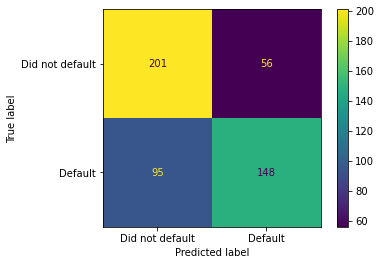

In [63]:
labels = ['Did not default', 'Default']
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, values_format = 'd', display_labels = labels)

Grid Search

In [64]:
param_grid = [{'C': [0.5, 1, 10, 100], # must be > 0
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf']
              },]

optimal_params = GridSearchCV(SVC(), param_grid, cv = 5, scoring = 'accuracy', verbose = 0)
# img from phone contains broad description of possible scoring arguments
optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [65]:
optimal_params = GridSearchCV(SVC(), param_grid, cv = 5, scoring = 'accuracy', verbose = 2)
optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.5, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=0.0

Random Search

In [66]:
param_grid = [{'C': range(1, 100, 10), # must be > 0
             'gamma': np.linspace(0, 1),
             'kernel': ['rbf']
              },]

optimal_params = RandomizedSearchCV(SVC(), param_grid, cv = 5, scoring = 'accuracy', verbose = 0)
optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'kernel': 'rbf', 'gamma': 0.1020408163265306, 'C': 51}


In [84]:
clf_svm = SVC(random_state = 42, C = 100, gamma = 0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001, random_state=42)

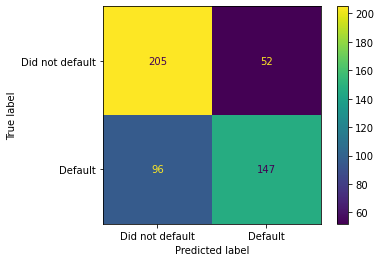

In [85]:
labels = ['Did not default', 'Default']
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, values_format = 'd', display_labels = labels)

Draw a SVM decison boundary

In [69]:
len(df_downsample.columns)

24

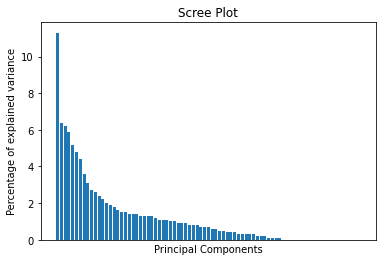

In [73]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = [str(x) for x in range(1, len(per_var) + 1)]

plt.bar(range(1, len(per_var) + 1), height = per_var)
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

The scree plot shows taht first principal component PC1, accounts for a relatively large amount of variation in the raw data and this means that it will be a good candidate for the x-axis in the 2-dimensional graph. However, PC2 is not much different from PC3 or PC4, which does not bode well for dimension reduction. Since we don't have a choice let's go with it.

In [75]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]

pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

param_grid = [{'C': [0.5, 1, 10, 100], # must be > 0
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf']
              },]

optimal_params = GridSearchCV(SVC(), param_grid, cv = 5, scoring = 'accuracy', verbose = 0)
optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [82]:
# display summary
# https://www.youtube.com/watch?v=8A7L0GsBiLQ&t=2220s
# ok. 43 min
clf_svm = SVC(random_state = 42, C = 100, gamma = 0.001)
clf_svm.fit(X_train_scaled, y_train)

X_test_pca = pca.fit_transform(X_train_scaled)

test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1
y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start = x_min, stop = x_max, step = 0.1),
                    np.arange(start = y_min, stop = y_max, step = 0.1))

Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize = (10, 10))
ax.contourf(xx, yy, Z, alpha = 0.1)
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c = y_train, cmap = cmap, s = 100, edgecolor = 'k', alpha = 0.7)
# ...
# not done
plt.show()

ValueError: X.shape[1] = 2 should be equal to 81, the number of features at training time

k-modes - grupowanie zmiennych kategorycznych

In [86]:
df = df[['plec', 'wyksztalcenie', 'stan_cywilny']]
df.head()

,plec,wyksztalcenie,stan_cywilny
1,2,2,1
2,2,2,2
3,2,2,2
4,2,2,1
5,1,2,1


In [106]:
df.plec.replace([1,2], ['kobieta', 'mezczyzna'], inplace = True)
df.wyksztalcenie.replace([0, 1, 2, 3, 4, 5, 6], ['nieznane', 'wyzsze_pelne', 'wyzsze', 'srednie', 'inne', 'nieznane', 'nieznane'], inplace = True)
df.stan_cywilny.replace([0, 1, 2, 3], ['nieznany', 'w_zwiazku', 'kawaler_panna', 'inny'], inplace = True)
df.head()

,plec,wyksztalcenie,stan_cywilny,segment
1,mezczyzna,wyzsze,w_zwiazku,2
2,mezczyzna,wyzsze,kawaler_panna,3
3,mezczyzna,wyzsze,kawaler_panna,3
4,mezczyzna,wyzsze,w_zwiazku,2
5,kobieta,wyzsze,w_zwiazku,6


In [87]:
import pandas as pd
import seaborn as sns
from kmodes.kmodes import KModes

In [109]:
res = []
for n in range(1, 20):
    km = KModes(n_clusters = n, init = 'Huang', n_init = 30, n_jobs = 4)
    km.fit_predict(df)
    res.append([n, km.cost_])

In [110]:
res = pd.DataFrame(res, columns = [0, 'wspolczynnik_odmiennosci']).set_index(0)

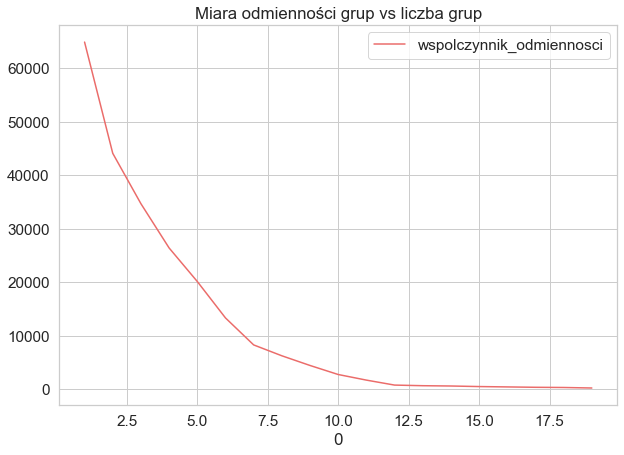

In [111]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4, style="whitegrid")
sns.lineplot(data = res, palette = ['#eb6c6a']).set(title = "Miara odmienności grup vs liczba grup")
plt.show()

In [112]:
km = KModes(n_clusters = 7, init = 'Huang', n_init = 30, n_jobs = 4)
clusters = km.fit_predict(df)

In [113]:
df = df.assign(segment = clusters)
df.segment = df.segment.astype(str)

In [114]:
for column in ['plec', 'wyksztalcenie', 'stan_cywilny']:
    print((df[column].value_counts(normalize = True) * 100).round(2))
    print('')

mezczyzna    60.36
kobieta      39.64
Name: plec, dtype: float64

wyzsze          46.85
wyzsze_pelne    35.35
srednie         16.28
nieznane         1.11
inne             0.41
Name: wyksztalcenie, dtype: float64

kawaler_panna    53.30
w_zwiazku        45.62
inny              1.08
Name: stan_cywilny, dtype: float64



In [115]:
segment_0 = df[df.segment == "0"]
for column in ['plec', 'wyksztalcenie', 'stan_cywilny']:
    print((segment_0[column].value_counts(normalize = True) * 100).round(2))
    print('')

mezczyzna    100.0
Name: plec, dtype: float64

wyzsze          67.69
wyzsze_pelne    30.09
nieznane         1.72
inne             0.50
Name: wyksztalcenie, dtype: float64

w_zwiazku    98.53
inny          1.47
Name: stan_cywilny, dtype: float64



Charakterystyka segmentu:</br>
Zmienna "plec" - mieszanka kobiet i mężczyzn. Brak wyraźnej dyskryminacji wg tej zmiennej.</br>
Zmienna "wyksztalcenie" - zdecydowana przewaga osób o średnim wykształceniu (najniższe z deklarowanych).</br>
Zmienna "stan_cywilny" - przewaga osób będących w związku.</br>
Segment 0 to klienci banku będący w stałych związkach, o średnim wykształceniu.

In [116]:
segment_1 = df[df.segment == "1"]
for column in ['plec', 'wyksztalcenie', 'stan_cywilny']:
    print((segment_1[column].value_counts(normalize = True) * 100).round(2))
    print('')

mezczyzna    100.0
Name: plec, dtype: float64

wyzsze    100.0
Name: wyksztalcenie, dtype: float64

kawaler_panna    100.0
Name: stan_cywilny, dtype: float64



In [117]:
segment_2 = df[df.segment == "2"]
for column in ['plec', 'wyksztalcenie', 'stan_cywilny']:
    print((segment_2[column].value_counts(normalize = True) * 100).round(2))
    print('')

mezczyzna    100.0
Name: plec, dtype: float64

wyzsze_pelne    100.0
Name: wyksztalcenie, dtype: float64

kawaler_panna    99.52
inny              0.48
Name: stan_cywilny, dtype: float64



In [118]:
segment_3 = df[df.segment == "3"]
for column in ['plec', 'wyksztalcenie', 'stan_cywilny']:
    print((segment_3[column].value_counts(normalize = True) * 100).round(2))
    print('')

mezczyzna    76.56
kobieta      23.44
Name: plec, dtype: float64

srednie     96.42
nieznane     2.39
inne         1.18
Name: wyksztalcenie, dtype: float64

kawaler_panna    51.55
w_zwiazku        45.70
inny              2.75
Name: stan_cywilny, dtype: float64



In [119]:
segment_4 = df[df.segment == "4"]
for column in ['plec', 'wyksztalcenie', 'stan_cywilny']:
    print((segment_4[column].value_counts(normalize = True) * 100).round(2))
    print('')

kobieta    100.0
Name: plec, dtype: float64

wyzsze      67.75
srednie     29.96
nieznane     1.77
inne         0.51
Name: wyksztalcenie, dtype: float64

w_zwiazku    100.0
Name: stan_cywilny, dtype: float64



In [120]:
segment_5 = df[df.segment == "5"]
for column in ['plec', 'wyksztalcenie', 'stan_cywilny']:
    print((segment_5[column].value_counts(normalize = True) * 100).round(2))
    print('')

kobieta    100.0
Name: plec, dtype: float64

wyzsze_pelne    100.0
Name: wyksztalcenie, dtype: float64

kawaler_panna    60.49
w_zwiazku        38.82
inny              0.69
Name: stan_cywilny, dtype: float64



In [121]:
segment_6 = df[df.segment == "6"]
for column in ['plec', 'wyksztalcenie', 'stan_cywilny']:
    print((segment_6[column].value_counts(normalize = True) * 100).round(2))
    print('')

kobieta    100.0
Name: plec, dtype: float64

wyzsze      97.34
nieznane     1.88
inne         0.78
Name: wyksztalcenie, dtype: float64

kawaler_panna    97.89
inny              2.11
Name: stan_cywilny, dtype: float64



Płeć

In [122]:
((df.groupby(['plec', 'segment'])['segment'].count().unstack().fillna(0) / df['segment'].value_counts()) * 100).round(2)

,0,1,2,3,4,5,6
plec,,,,,,,
kobieta,0.0,0.0,0.0,23.44,100.0,100.0,100.0
mezczyzna,100.0,100.0,100.0,76.56,0.0,0.0,0.0


Wykształcenie

In [123]:
((df.groupby(['wyksztalcenie', 'segment'])['segment'].count().unstack().fillna(0)/df['segment'].value_counts())*100).round(2)

,0,1,2,3,4,5,6
wyksztalcenie,,,,,,,
inne,0.50,0.0,0.0,1.18,0.51,0.0,0.78
nieznane,1.72,0.0,0.0,2.39,1.77,0.0,1.88
srednie,0.00,0.0,0.0,96.42,29.96,0.0,0.00
wyzsze,67.69,100.0,0.0,0.00,67.75,0.0,97.34
wyzsze_pelne,30.09,0.0,100.0,0.00,0.00,100.0,0.00


Stan cywilny

In [124]:
((df.groupby(['stan_cywilny', 'segment'])['segment'].count().unstack().fillna(0)/df['segment'].value_counts())*100).round(2)

,0,1,2,3,4,5,6
stan_cywilny,,,,,,,
inny,1.47,0.0,0.48,2.75,0.0,0.69,2.11
kawaler_panna,0.00,100.0,99.52,51.55,0.0,60.49,97.89
w_zwiazku,98.53,0.0,0.00,45.70,100.0,38.82,0.00
